<a href="https://colab.research.google.com/github/nadyasyahrita/Pie-Sales-with-Multiple-Regression/blob/main/Multiple_Regression_Pie_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

setelah meng-import library yang ada, langkah selanjutnya yaitu meng-import dataset

In [50]:
#import dataset#
df_pie = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_pie

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


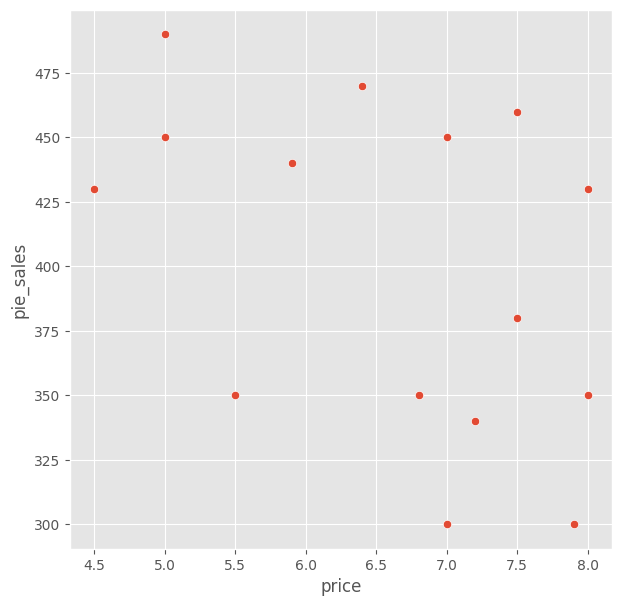

In [51]:
#Visualize Data Using Scatter Plot#
sns.scatterplot(x="price", y="pie_sales", data= df_pie)
plt.show()

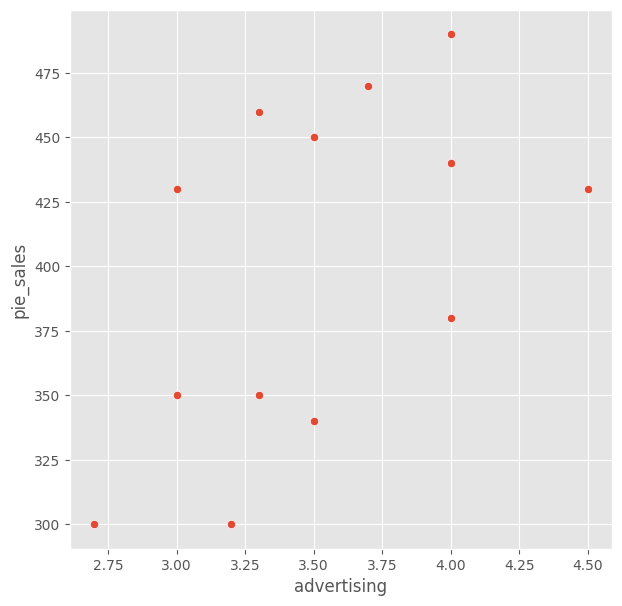

In [52]:
#Visualize Data Using Scatter Plot#
sns.scatterplot(x="advertising", y="pie_sales", data=df_pie)
plt.show()

**Regression Using Sklearn**



In [53]:
X = df_pie[['price', 'advertising']]
Y = df_pie['pie_sales']
x_surf, y_surf = np.meshgrid(np.linspace(df_pie.price.min(), df_pie.price.max(), 100),
                             np.linspace(df_pie.advertising.min(), df_pie.advertising.max(), 100))
onlyX = pd.DataFrame({'price': x_surf.ravel(), 'advertising': y_surf.ravel()})

In [54]:
#with sklearn#
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


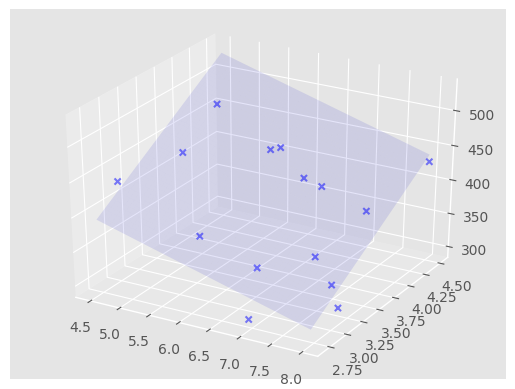

In [56]:
#Visualizing Linear Regression#
plt.style.use('default')
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fitY = regr.predict(onlyX)
fitY=np.array(fitY)

ax.scatter(df_piesales['price'], df_piesales['advertising'], df_piesales['pie_sales'],c='blue', marker='x', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fitY.reshape(x_surf.shape), color='b', alpha=0.1)
plt.show()

In [57]:
#prediction using sklearn#
new_price = 8.5
new_advertising = 3.8
print ('Predicted pie sales: \n', regr.predict([[new_price, new_advertising]]))

Predicted pie sales: 
 [375.93557084]


In [58]:
new_price = 10
new_advertising = 12
print ('Predicted pie sales: \n', regr.predict([[new_price, new_advertising]]))

Predicted pie sales: 
 [946.34678797]


Dapat dilihat bahwa ketika dilakukan prediksi dan harga serta iklan dinaikkan, maka penjualan akan naik. Demikian pula sebaliknya. 

In [59]:
X = sm.add_constant(X) # adding a constant

In [60]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Thu, 22 Oct 2020   Prob (F-statistic):             0.0120
Time:                        09:06:30   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      